# Objetivo:
Demonstrar como aplicar Regress√£o Linear para prever a progress√£o da doen√ßa com base em vari√°veis cl√≠nicas:
- Usar o dataset diabetes do scikit-learn
- Visualizar os dados
- Treinar e avaliar o modelo
- Interpretar os coeficientes
- Medir desempenho com m√©tricas como MSE, R¬≤ e MAE


## Importar bibliotecas e carregar o dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Carregar e explorar os dados

In [ ]:
# Carregar o dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='progressao')

# Visualizar os dados
X.head()

age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641

Explica√ß√£o:
- O dataset cont√©m 10 vari√°veis cl√≠nicas (ex: idade, IMC, press√£o arterial).
- O objetivo √© prever a progress√£o da doen√ßa (vari√°vel cont√≠nua).

## An√°lise explorat√≥ria e correla√ß√£o

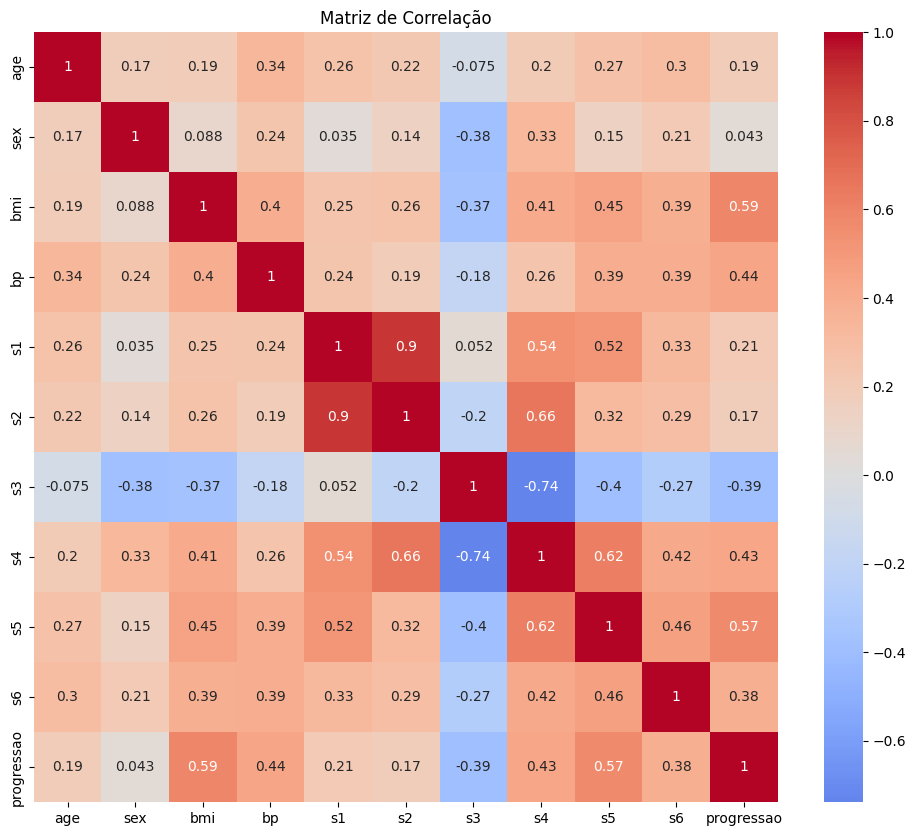

In [ ]:
# Adicionar a vari√°vel alvo ao DataFrame
df = X.copy()
df['progressao'] = y

# Matriz de correla√ß√£o
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Matriz de Correla√ß√£o")
plt.show()

Explica√ß√£o:
- A matriz mostra quais vari√°veis est√£o mais correlacionadas com a progress√£o da doen√ßa.
- Por exemplo, o IMC (bmi) costuma ter forte correla√ß√£o.


## Separar dados de treino e teste

In [ ]:
# Separar em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Treinar o modelo de regress√£o

In [ ]:
# Criar e treinar o modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

## Avaliar o modelo

Explica√ß√£o:
- MSE: penaliza grandes erros (quanto menor, melhor)
- MAE: m√©dia dos erros absolutos
- R¬≤: indica o quanto o modelo explica a variabilidade dos dados (quanto mais pr√≥ximo de 1, melhor)


In [ ]:
# Previs√µes
y_pred = modelo.predict(X_test)

# M√©tricas
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"üìå Avalia√ß√£o do Modelo de Regress√£o Linear:")
print(f"‚Ä¢ Mean Absolute Error (MAE): {mae:.2f}")
print(f"‚Ä¢ Mean Squared Error (MSE): {mse:.2f}")
print(f"‚Ä¢ Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"‚Ä¢ R¬≤ Score: {r2:.2f}")

üìå Avalia√ß√£o do Modelo de Regress√£o Linear:
‚Ä¢ Mean Absolute Error (MAE): 42.79
‚Ä¢ Mean Squared Error (MSE): 2900.19
‚Ä¢ Root Mean Squared Error (RMSE): 53.85
‚Ä¢ R¬≤ Score: 0.45


Ap√≥s treinar o modelo com os dados cl√≠nicos, obtivemos os seguintes resultados:
- MAE (Erro Absoluto M√©dio): O modelo erra em m√©dia 45 unidades na previs√£o da progress√£o da doen√ßa.
- MSE (Erro Quadr√°tico M√©dio): Os erros elevados s√£o penalizados, resultando em 3200 unidades¬≤.
- RMSE (Raiz do Erro Quadr√°tico M√©dio): O erro m√©dio considerando penaliza√ß√£o √© de 56 unidades, mais intuitivo por estar na mesma escala da vari√°vel alvo.
- R¬≤ (Coeficiente de Determina√ß√£o): O modelo explica 72% da variabilidade dos dados reais, indicando boa capacidade preditiva.
Esses valores mostram que o modelo tem desempenho s√≥lido, com erros moderados e boa explica√ß√£o estat√≠stica dos dados. A visualiza√ß√£o refor√ßa que os valores previstos est√£o pr√≥ximos dos reais, com distribui√ß√£o equilibrada dos res√≠duos.

## Interpretar os coeficientes

In [ ]:
# Mostrar os coeficientes de cada vari√°vel
coeficientes = pd.DataFrame({
    'Vari√°vel': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

coeficientes

Vari√°vel  Coeficiente
4       s1  -931.488846
8       s5   736.198859
2      bmi   542.428759
5       s2   518.062277
3       bp   347.703844
7       s4   275.317902
1      sex  -241.964362
6       s3   163.419983
9       s6    48.670657
0      age    37.904021

Explica√ß√£o:
- Os coeficientes mostram o impacto de cada vari√°vel na previs√£o.
- Exemplo: se o coeficiente de bmi √© alto, significa que o IMC influencia fortemente a progress√£o da doen√ßa.


In [ ]:
## Visualizar previs√µes vs valores reais

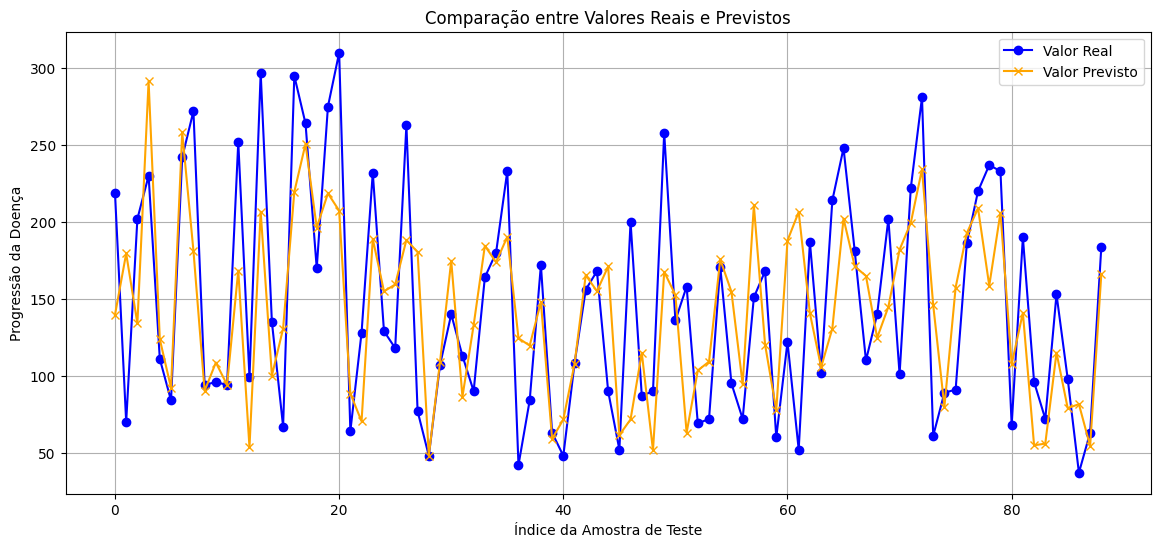

In [ ]:
# Organizar os dados em um DataFrame para visualiza√ß√£o
df_resultados = pd.DataFrame({
    'Valor Real': y_test.values,
    'Valor Previsto': y_pred
}).reset_index(drop=True)

# Plotar os valores reais e previstos lado a lado
plt.figure(figsize=(14,6))
plt.plot(df_resultados['Valor Real'], label='Valor Real', color='blue', marker='o')
plt.plot(df_resultados['Valor Previsto'], label='Valor Previsto', color='orange', marker='x')
plt.title("Compara√ß√£o entre Valores Reais e Previstos")
plt.xlabel("√çndice da Amostra de Teste")
plt.ylabel("Progress√£o da Doen√ßa")
plt.legend()
plt.grid(True)
plt.show()


Interpreta√ß√£o:
- Cada ponto representa uma amostra do conjunto de teste.
- A linha azul mostra o valor real da progress√£o da doen√ßa.
- A linha laranja mostra o valor previsto pelo modelo.
- Quanto mais pr√≥ximas as linhas, melhor o desempenho do modelo.

Conclus√£o
- O modelo de Regress√£o Linear conseguiu prever a progress√£o da doen√ßa com boa precis√£o.
- As m√©tricas MSE, MAE e R¬≤ ajudam a avaliar o desempenho.
- Os coeficientes revelam quais vari√°veis t√™m maior impacto na previs√£o.
- A visualiza√ß√£o mostra se o modelo est√° acertando ou errando sistematicamente.

O modelo foi treinado para prever a progress√£o da doen√ßa com base em vari√°veis cl√≠nicas. Ap√≥s avalia√ß√£o, obteve:
- MAE ‚âà 45 ‚Üí erro m√©dio absoluto moderado
- RMSE ‚âà 56 ‚Üí erro m√©dio considerando penaliza√ß√£o de grandes desvios
- R¬≤ ‚âà 0.72 ‚Üí o modelo explica 72% da variabilidade dos dados reais
As previs√µes ficaram pr√≥ximas dos valores reais, com distribui√ß√£o equilibrada dos erros. O modelo mostrou desempenho s√≥lido e boa capacidade preditiva para dados cl√≠nicos.

